In my ongoing project to get up to speed in Julia, I'm now
 taking a look at "arensdorf orbits", that were designed
 by Richard Arensdorf while he was figuring out how to
 put men on the moon.

 It's a simple diferential equation, and it gives nice plots
 so it's perfect to exercise two parts of my Julia-Fu
 
 https://www.johndcook.com/blog/2020/02/08/arenstorf-orbit/


In [3]:
import Pkg; 
Pkg.add("DifferentialEquations")
Pkg.add("OrdinaryDiffEq")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed VertexSafeGraphs ──────────── v0.1.1
 Installed FunctionWrappers ──────────── v1.0.0
 Installed ExponentialUtilities ──────── v1.6.0
 Installed ArrayInterface ────────────── v2.4.1
 Installed NLSolversBase ─────────────── v7.6.1
 Installed LightGraphs ───────────────── v1.3.0
 Installed Roots ─────────────────────── v0.8.4
 Installed DifferentialEquations ─────── v6.11.0
 Installed DiffEqFinancial ───────────── v2.2.1
 Installed FillArrays ────────────────── v0.8.4
 Installed SimpleTraits ──────────────── v0.9.1
 Installed DelayDiffEq ───────────────── v5.21.0
 Installed FiniteDiff ────────────────── v2.2.0
 Installed DiffEqJump ────────────────── v6.5.0
 Installed ArrayLayouts ──────────────── v0.1.5
 Installed OrdinaryDiffEq ────────────── v5.29.0
 Installed

In [4]:
using DifferentialEquations
using OrdinaryDiffEq
using Plots

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1273


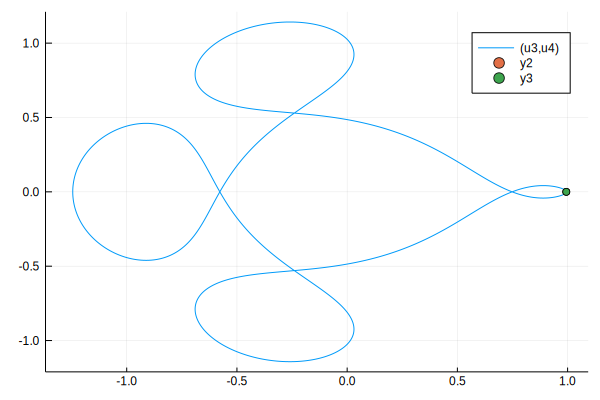

In [5]:
function plot_arensdorf()
     μ   = 0.012277471
     μ′  = 1 - μ

     function arensdorf_orbit(du, u, z, p, t)
         x, y  = z
         x′,y′ = u

         D(z) = ((x + z)^2  + y^2)^(3/2)
         D1 = D( μ)
         D2 = D(-μ′)

         x′′ = x + 2y′  - (μ′*(x + μ)/D1) - (μ*(x - μ′)/D2)
         y′′ = y - 2x′  - (μ′*y/D1)       - (μ*y/D2)

         du[1] = x′′
         du[2] = y′′
     end


     initial_positions =  [0.994,  0]
     initial_velocities = [0.0,   -2.00158510637908252240537862224]
    
     # After I asked for help on the julia discourse (discussion forum), 
     # Christopher Rackauckas and Chris Hanson chimed in and suggested
     # a few changes, including which solver to use.  It turns out that this
     # problem has a reputation for being able to blow up solvers :-) Anyhow,
     # now there is a nice plot. Yay!
     N = 1
     tend = 17.0652165601579625588917206249
     tspan = (0.0, N*tend)
     prob = SecondOrderODEProblem(arensdorf_orbit, initial_velocities, initial_positions, tspan)
    

     sol = solve(prob, Vern9(), abstol=1e-12, reltol=1e-12)

     plot(sol,vars=(3,4))
     scatter!([sol[3,1]],[sol[4,1]])
     scatter!([sol[3,end]],[sol[4,end]])    
   end
plot_arensdorf()